# Dataset
Retreive datasets from kaggle <br>
link: https://www.kaggle.com/datasets/camnugent/california-housing-prices/code

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krakenhaus404","key":"53e5925ba30be8a7f11e80769e3409a8"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset          Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           2083         93  1.0              
nelgiriyewithana/countries-of-the-world-2023                      Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33            986         49  1.0              
shuvammandal121/9000-companies-and-its-ratings-dataset            9000 companies and its ratings dataset              202KB  2023-07-12 04:52:05            546         28  1.0              
arnavsmayan/netflix-userbase-dataset              

In [ ]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 95.5MB/s]


In [ ]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


#Libraries
install necessary libraries that will use for the prediction

In [ ]:
!pip install numpy
!pip install pandas
!pip install ma tplotlib
!pip install seaborn
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement tplotlib (from versions: none)
ERROR: No matching distribution found for tplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Cleaning
Drop the the column that contains null data

In [ ]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Split the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
train_data = x_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2176,-119.85,36.76,10.0,2067.0,450.0,845.0,354.0,1.8214,INLAND,80100.0
4895,-118.24,34.01,48.0,396.0,99.0,485.0,110.0,2.3750,<1H OCEAN,107500.0
981,-121.85,37.68,4.0,4719.0,741.0,1895.0,742.0,6.8132,INLAND,282500.0
13460,-117.39,34.10,19.0,1000.0,211.0,572.0,230.0,2.4028,INLAND,112500.0
16139,-122.46,37.78,52.0,2632.0,542.0,1364.0,544.0,3.4605,NEAR BAY,441700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

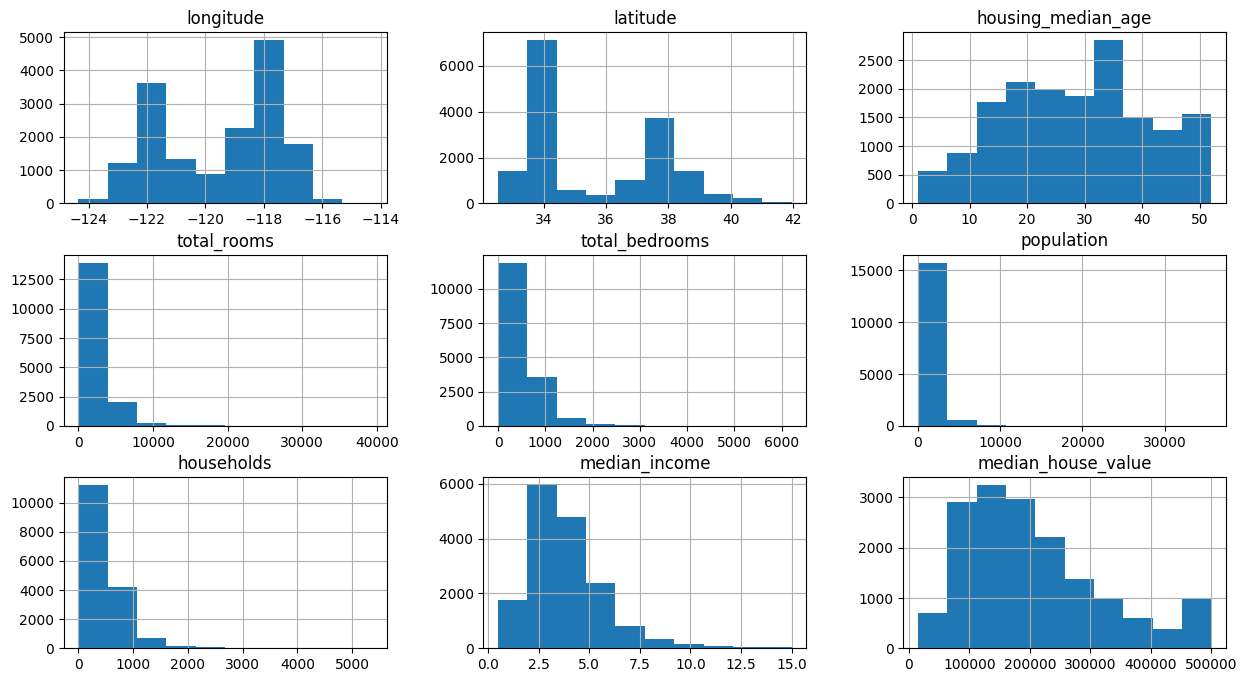

In [ ]:
train_data.hist(figsize=(15, 8))

# Data Correlation
Visualize correlation between datas

<br>
Correlation Meaning:
<ul>
  <li> 0 - 0.19 -> very weak </li>
  <li> 0.2 - 0.39 -> weak </li>
  <li> 0.4 - 0.19 -> moderate </li>
  <li> 0.6 - 0.79 -> strong </li>
  <li> 0.8 - 1-> very strong </li>
</ul>

source: https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression

<ipython-input-15-b46b043f08b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

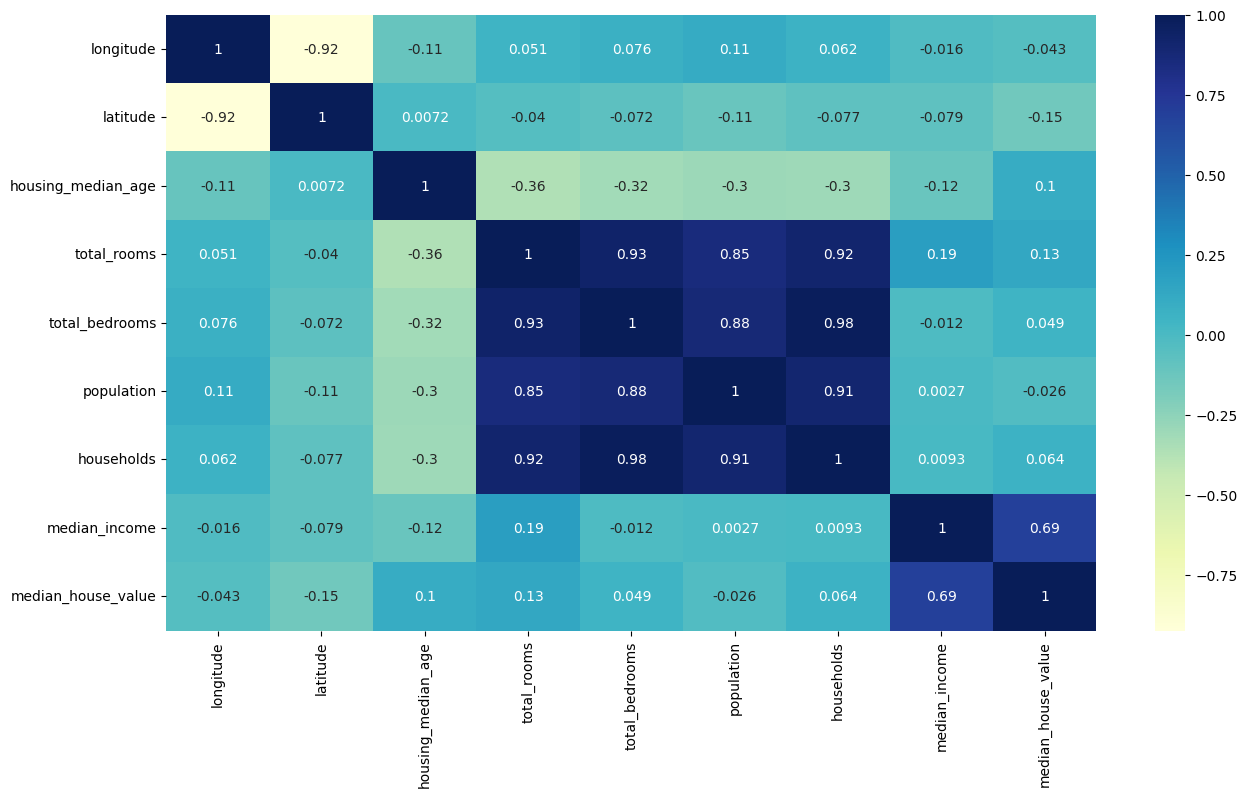

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

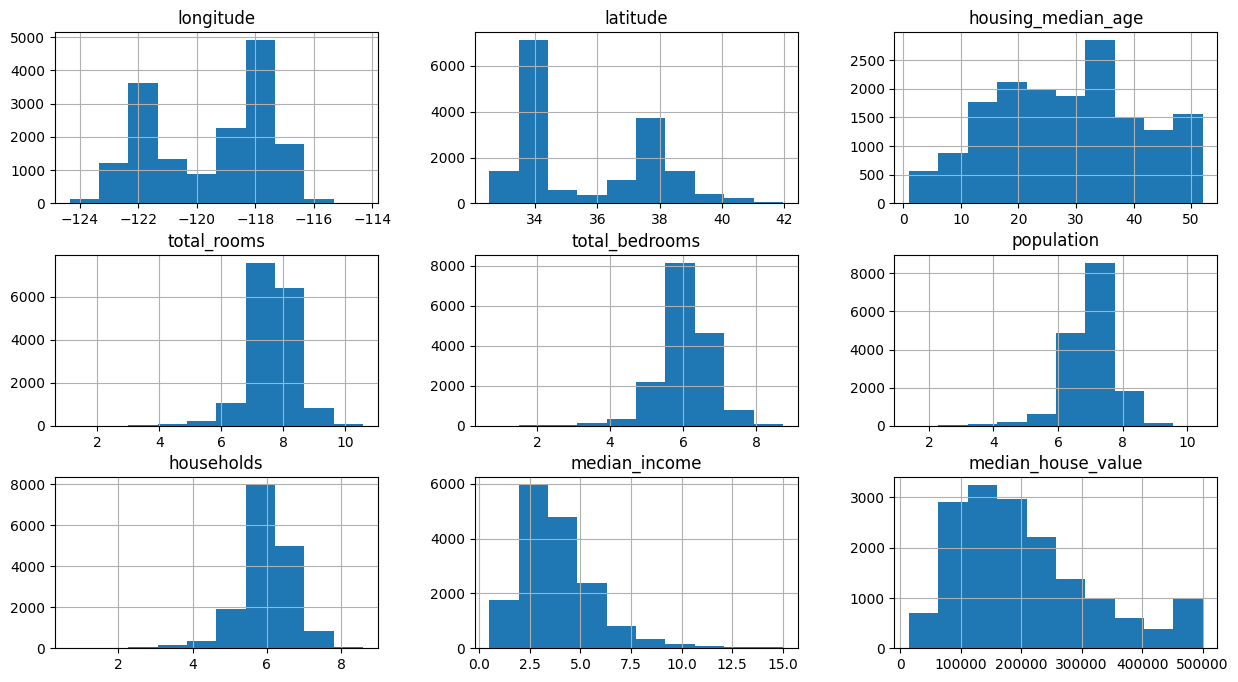

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

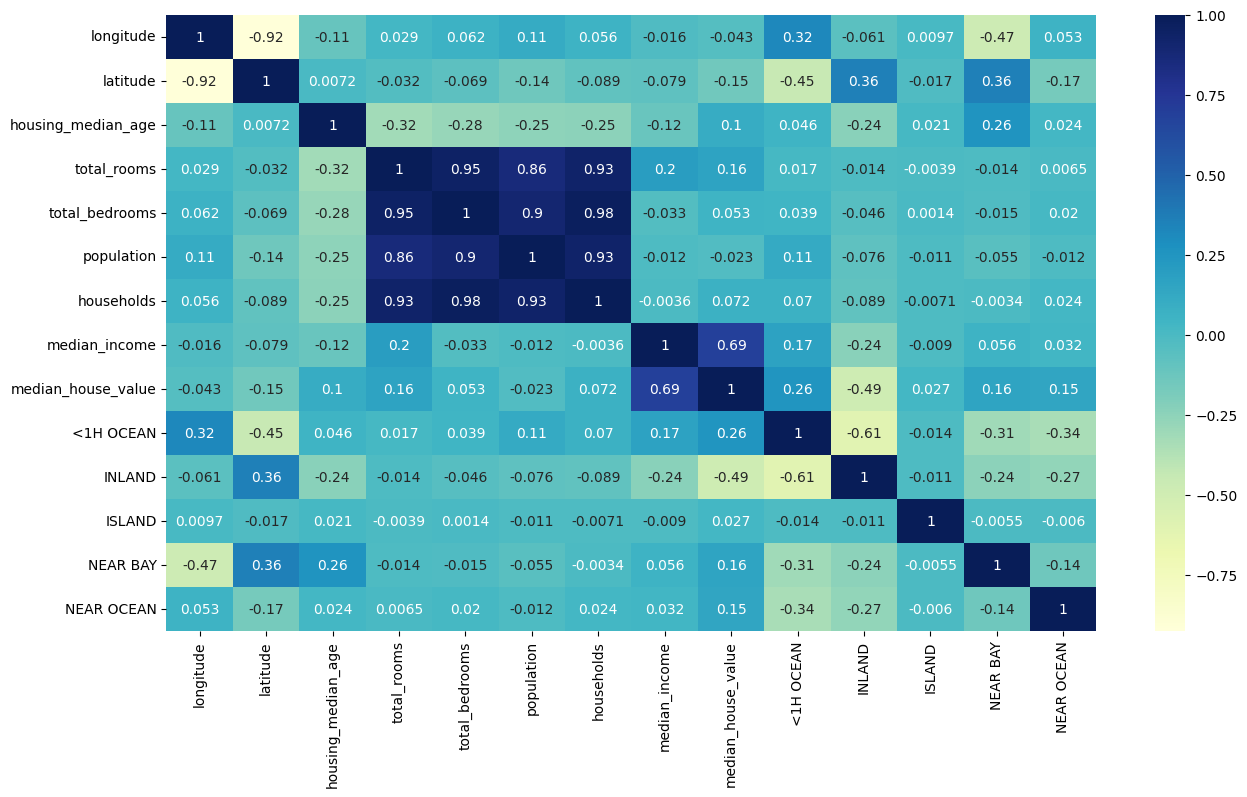

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

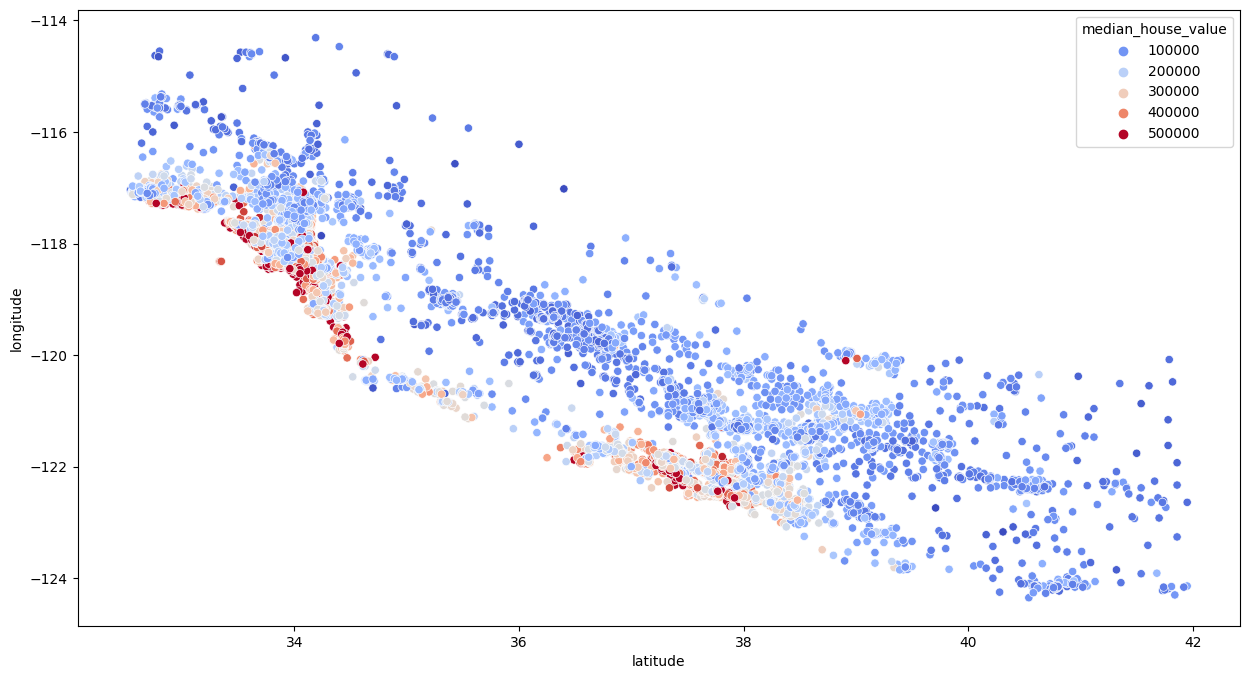

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

# Feature Engineering

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

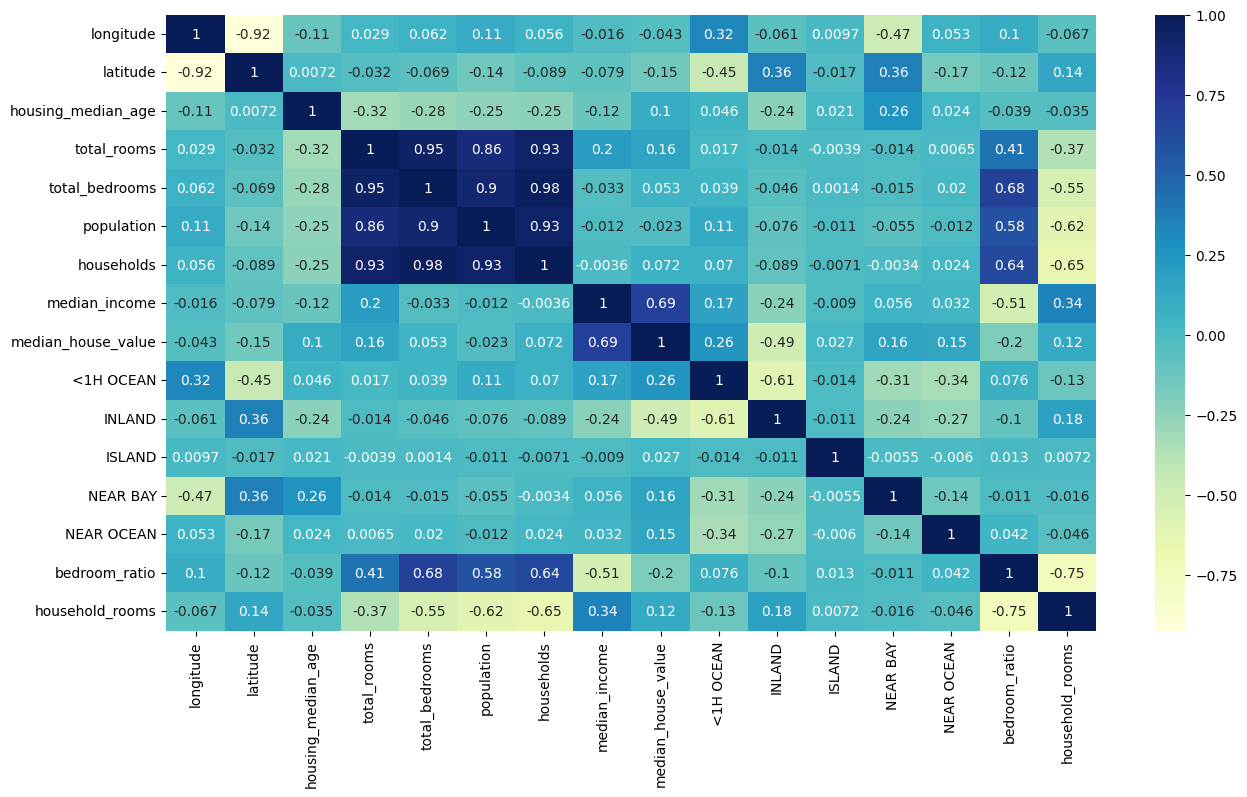

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Train Model


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12550,-121.48,38.55,52.0,7.429521,5.736572,6.516193,5.693732,4.1467,175000.0,0,1,0,0,0,0.772132,1.304860
18002,-121.98,37.28,27.0,8.168203,6.380123,7.453562,6.317165,5.7812,275000.0,1,0,0,0,0,0.781093,1.293017
2973,-119.08,35.34,15.0,7.296413,5.463832,6.645091,5.476464,4.1528,130100.0,0,1,0,0,0,0.748838,1.332322
10850,-117.91,33.66,21.0,7.443664,6.226537,7.003065,6.075346,3.2250,193800.0,1,0,0,0,0,0.836488,1.225225
979,-121.87,37.67,10.0,8.375169,6.685861,7.503290,6.612041,5.5000,247200.0,0,1,0,0,0,0.798296,1.266654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,-117.14,32.71,43.0,6.874198,5.545177,6.754604,5.342334,1.2841,72000.0,0,0,0,0,1,0.806665,1.286741
19077,-122.49,38.27,8.0,8.535622,6.896694,7.413367,6.842683,3.5625,213200.0,0,0,0,1,0,0.807990,1.247409
9034,-117.76,34.71,15.0,8.000349,6.439350,7.435438,6.293419,2.9541,106700.0,0,1,0,0,0,0.804884,1.271225
4889,-118.26,34.02,39.0,6.549651,5.451038,6.953684,5.433722,2.2356,119500.0,1,0,0,0,0,0.832264,1.205371


In [ ]:
reg.score(x_test, y_test)

0.655860570649489

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8099314751089751

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None,4, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test, y_test)

0.8145046481187342